In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

Это набор данных из одного банка в Соединенных Штатах. Помимо обычных услуг, этот банк также предоставляет услуги по страхованию автомобилей. Банк регулярно организует кампании по привлечению новых клиентов. У банка есть данные потенциальных клиентов, и сотрудники банка звонят им для рекламы доступных вариантов страхования автомобилей. Нам предоставляется общая информация о клиентах (возраст, работа и т.д.), А также более конкретная информация о текущей кампании по продаже страховых услуг (общение, последний день контакта) и предыдущих кампаниях (такие атрибуты, как предыдущие попытки, результат).
У вас есть данные о 4000 клиентах, с которыми связывались во время последней кампании и для которых известны результаты кампании (купил клиент страховку или нет).

Задача состоит в том, чтобы написать модель, которая будет предсказывать для клиентов, с которыми связались во время текущей кампании, **будут ли они покупать страховку автомобиля или нет**.


**Атрибуты**:

- Id - уникальный идентификатор клиента
- Age - Возраст
- Job - Работа
- Marital - Семейное положение
- Education - Образование
- Default - Имеет ли кредит по умолчанию?
- Balance - Среднегодовой баланс, в долларах США
- HHInsurance - Застраховано ли домашнее хозяйство
- CarLoan - Имеет ли клиент автокредит
- Communication - Тип контактной связи
- LastContactDay - День последнего контакта
- LastContactMonth - Месяц последнего контакта
- NoOfContacts - Количество контактов, выполненных в ходе этой кампании для данного клиента
- DaysPassed - Количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое значение; -1 означает, что с клиентом ранее не связывались)
- PrevAttempts - Количество контактов, выполненных до этой кампании и для данного клиента
- Outcome - Результаты предыдущей маркетинговой кампании
- CallStart - Время начала последнего звонка
- CallEnd - Время конца последнего звонка
- CarInsurance - Оформил ли клиент страховку автомобиля?

**Установите с самом начале (в качестве random_state) RAND=10**

# Import data

1) Прочитать файл carInsurance_train.csv и записать в переменную ```df```

In [20]:
df = pd.read_csv('carInsurance_train.csv')

2) Вывести общую информацию о датасете при помощи метода ```info()```, а также основные описательные статистики для числовых и категориальных признаков

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

# EDA

3) Посмотрите на целевую переменную **CarInsurance**, есть ли дисбаланс классов? Отобразите на графике процентное содержание объектов в каждом классе (пример в лекции по EDA)

<Axes: ylabel='count'>

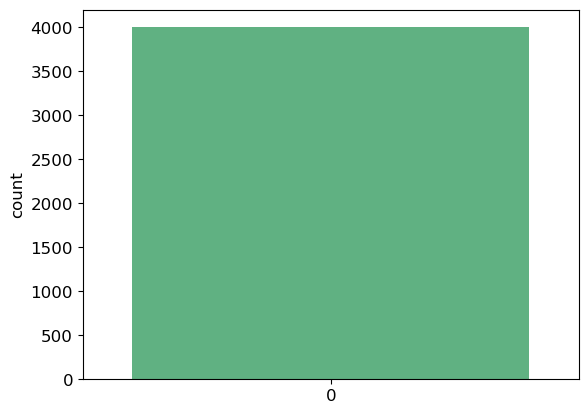

In [27]:
green = '#52BE80'
red = '#EC7063'
sns.countplot(df['CarInsurance'], palette=[green, red])

4) При помощи признака **CallEnd** создать новый признак **time_of_day** - сутки, где:
- Если значение в CallEnd больше или равно 12 часам, то значение в признаке ```time_of_day='Afternoon'```
- Иначе ```'Morning'```

Подсказка: можно преобразовать признак CallEnd при помощи ```pd.to_datetime``` (используйте часы из даты!), далее использовать``` transform``` и ```lambda```, сделать это можно в одной строке.

In [28]:
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


5) Создайте новый признак **call_duration** - длительность последнего звонка **в секундах** тип ```int```, должно быть положительное значение!

- использовать для вычисления **call_duration** признаки **CallEnd** и **CallStart** (подсказка ```pd.to_datetime``` и далее для вычисления секунд ```transform``` с ```lambda```)
- после чего **удалите признаки CallEnd и CallStart**

In [35]:
df['call_duration'] = pd.to_datetime(df['CallEnd']) - pd.to_datetime(df['CallStart'])

6) Создайте признаки:

- **Age_bins** - на основе признака Age при помощи функции ```get_bins_age()``` ниже
- **Balance_bins** - на основе признака Balance при помощи функции ```get_bins_balance()``` ниже

In [36]:
def get_bins_age(data: int) -> str:
    """
    Генерация бинов для признака "возраст"
    """
    if isinstance(data, (int, float)):
        if data <= 35:
            return 'young'
        elif 35 < data <= 55:
            return 'middle-aged'
        elif data > 55:
            return 'older'

In [37]:
def get_bins_balance(data: int) -> str:
    """
    Генерация бинов для признака "доход/зарплата"
    """
    if isinstance(data, (int, float)):
        if data <= 1000:
            return 'low'
        elif 1000 < data <= 5000:
            return 'middle'
        elif data > 5000:
            return 'high'

In [38]:
# Ваш код

7) Проверьте, есть ли пропуски? Если есть заполните ```'None'``` - для object и медианой для числовых данных

In [41]:
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,call_duration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0,0 days 00:01:10
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0,0 days 00:03:05
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1,0 days 00:05:40
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1,0 days 00:13:39
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0,0 days 00:03:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1,0 days 00:04:29
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0,0 days 00:02:05
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0,0 days 00:04:50
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0,0 days 00:01:39


8) Преобразуйте категориальные данные в бинарные при помощи ```pd.get_dummies()```, а также удалите колонку **'Id'**. Запишите результат в новую переменную ```df_label```

Параметр ```drop_first``` использовать не нужно! 

In [40]:
pd.get_dummies()

TypeError: get_dummies() missing 1 required positional argument: 'data'

# Modeling

9) Разделите выборку на train и test данные. Используйте стратификацию stratify, test_size=0.2, а также фиксацию random_state. Целевая переменная **CarInsurance**

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(df['text'], df[CarInsurance], test_size=0.2, random_state=32)

KeyError: 'text'

## Baseline

10) Обучение бейзлайнов:

- Обучите бейзлайны **BaggingClassifier** и **RandomForestlassifier**, не забудьте везде зафиксировать random_state
- Добавьте **для каждого алгоритма** результаты в датасет с метриками, датасет с метриками сохраните в переменную ```metrics```
- Сравните результаты по метрикам
- Проверьте, не переобучились ли модели

**Внимание!**

Baseline - модель с параметрами по умолчанию!!! Можно зафиксировать только random_state

In [ ]:
# Ваш код

In [ ]:
metrics = 

## GridSearchCV

11) Выберите лучший бейзлайн (алгоритм) и найдите лучшие параметры помощи Gridsearch, также используйте кросс-валидацию со стратификацией внутри ```GridSearchCV``` на 3 фолдах. 

**Подсказка:** возьмите 100 деревьев, так как датасет небольшой

Находить параметры вы можете долго ~ 10-30 минут, поставьте n_jobs=-1, чтобы алгоритм быстрее обучался 

In [ ]:
# Ваш код

## Learn model with best params (holdout)

12) Обучение выбранную ранее модель на лучших параметрах

- Далее используйте кросс-валидацию со стратификацией **StratifiedKFold с 3мя фолдами**
- Не забудьте для StratifiedKFold зафиксировать **random_state**
- Подайте на вход выбранной ранее модели **лучшие параметры**, полученные путем поиска по сетке
- В качестве метрики возьмите **ROC_AUC**
- На каждом фолде подсчитать значение **ROC-AUC на validation** данных и **вывести**
- Выведите по итогу **среднее значение ROC-AUC** полученное на всех фолдах

In [ ]:
# Ваш код

13) Получите **предсказанные значения на Holdout** данных при помощи усреднения значений (для вероятностй) и моды (для меток классов), полученных при обучении на фолдах

**Сравните** результат ROC-AUC на validation (OOF) и на test данных (Holdout)

In [ ]:
# Ваш код

14) Добавьте в датасет с метриками ```metrics``` результаты обучения модели с **StratifiedKFold на Holdout данных**.

Где вы получили самые наилучшие результаты?

In [ ]:
# Ваш код

**Если вы получили ROC-AUC на Holdout меньше 0.92, то нужно тщательнее подобрать параметры в GridSearchCV, иначе работа не будет засчитана**

# Feature importance

15) Важные признаки

- Чтобы нам было чуть проще, обучите выбранную модель из **12 задания** на наилучших подобранных для нее параметрах, **кросс-валидация не нужна**
- Выведите feature importance для лучшего алгоритма с подобранными параметрами 2-мя способами:
    - **Permutation Importance**
    - Библиотеку **SHAP** (подсказка, можно рассмотреть только для одного класса ```shap_values[:, :, 1]``` - 1ый класс) 
- Какие первые три признака оказывают наибольшее влияние на то, что клиент оформит/не оформит страховку?

In [ ]:
# Ваш код

# Задание со звездочкой

16) Попробуйте изучить первые ТОП-5 признаков (можно permutation использовать, либо shap) из задания 15 при помощи различных графиков. Лучше НЕ использовать бинаризованный датасет для анализа различных значений в признаке.

Сделайте **выводы** на основании графиков и дайте **рекомендации бизнесу** (написать в 3-4 предложениях) по тому, на каких клиентов стоит обратить внимание, либо на какие-то аспекты в работе (зависит от набора признаков)

In [ ]:
# Ваш код